B N N B B B B B N B B N B B B N B B B B
B N B B B B N N N B B B B N B B B N B N
N N B B B N B B N B N B B B B N N B N B
N N B N B N B N B B B B B N B B B N B B
N B N B B N B B B B N B B B N B B B B B
B N B B B B B B B B B B N B B B B N B B
B B N N N B B N N B B B B B N B B B B B
B B B N B B B B B N B N N B N N B B B N
B N N B B B N B B B B B N B N N B B B N
N B B B B N N B B N B B N B B B B B B B
B B B B B N N B B N B N B N N B B B B B
B B B B B N B N B B B N B B N B B N N B
B B B B B B B N N B N B N B N B B B B B
B N N N B B B B B B B B N B B N N N B B
B B B B B B B B B B B B B B N B N B B B
B B B N N B B N B B B B N B N B B B N B
B B N B B B N N B B B B B B B B N N N B
N B B B B N B B B N B B B N B B B B B B
B B B B N B N N N B B N B N B B N B N N
N B B B B N B B N B N B B B B N B B B B


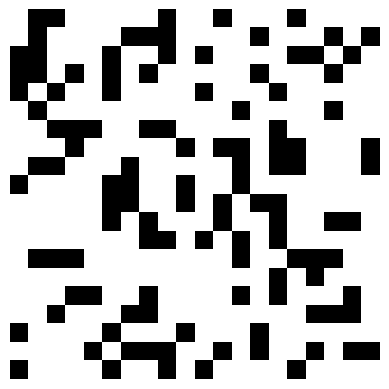

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Grid:
    def __init__(self, rows, cols, black_count):
        self.rows = rows
        self.cols = cols
        self.grid = [['B' for _ in range(cols)] for _ in range(rows)]
        self.generate_black_cells(black_count)

    def generate_black_cells(self, black_count):
        for _ in range(black_count):
            row = np.random.randint(0, self.rows)
            col = np.random.randint(0, self.cols)
            self.grid[row][col] = 'N'

    def get_cell(self, row, col):
        return self.grid[row][col]

    def set_cell(self, row, col, status):
        self.grid[row][col] = status

    def display(self):
        for row in self.grid:
            print(' '.join(row))

    def plot(self):
        plt.imshow([[0 if cell == 'B' else 1 for cell in row] for row in self.grid], cmap='binary')
        plt.axis('off')
        plt.show()

# Exemple d'utilisation
rows = 20
cols = 20
black_count = 130
grid = Grid(rows, cols, black_count)
grid.display()  # Afficher la grille dans la console
grid.plot()  # Afficher la grille avec matplotlib



In [14]:
def is_connected(grid):
    def dfs(row, col):
        visited.add((row, col))
        for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            new_row, new_col = row + dr, col + dc
            if 0 <= new_row < rows and 0 <= new_col < cols and grid[new_row][new_col] == 'B' and (new_row, new_col) not in visited:
                dfs(new_row, new_col)

    rows = len(grid)
    cols = len(grid[0])
    visited = set()

    # Trouver la première case blanche comme point de départ
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 'B':
                start_row, start_col = i, j
                break
        else:
            continue
        break
    else:
        # Aucune case blanche trouvée
        return False

    # Parcours en profondeur à partir du point de départ
    dfs(start_row, start_col)

    # Vérifier si toutes les cases blanches ont été visitées
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 'B' and (i, j) not in visited:
                return False

    return True

# Exemple d'utilisation
grid = [
    ['B', 'N', 'B', 'B'],
    ['B', 'B', 'N', 'B'],
    ['B', 'N', 'B', 'B'],
    ['B', 'B', 'B', 'B']
]

print(is_connected(grid))  # Renvoie False


True


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class TreeNode:
    def __init__(self, position, path_so_far=None):
        self.position = position
        if path_so_far:
            self.path = path_so_far + [position]
        else:
            self.path = [position]
        self.children = []

def find_paths(grid, start, end):
    def is_valid_move(row, col):
        return 0 <= row < len(grid) and 0 <= col < len(grid[0]) and grid[row][col] != 'X'

    def explore_path(node):
        row, col = node.position
        if (row, col) == end:
            paths.append(node.path)
        else:
            for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                new_row, new_col = row + dr, col + dc
                if is_valid_move(new_row, new_col) and (new_row, new_col) not in visited:
                    visited.add((new_row, new_col))
                    child_node = TreeNode((new_row, new_col), node.path)
                    node.children.append(child_node)
                    explore_path(child_node)
                    visited.remove((new_row, new_col))

    paths = []
    visited = set()
    root = TreeNode(start)
    visited.add(start)
    explore_path(root)
    return paths





In [31]:
def find_shortest_path(paths, grid):
    # Filter out paths containing obstacles
    valid_paths = [path for path in paths if all(grid[pos[0]][pos[1]] != 'X' for pos in path)]
    if valid_paths:
        shortest_path = min(valid_paths, key=len)
        return shortest_path
    else:
        return None


Tous les chemins possibles vers la destination : [[(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)]]
Le chemin le plus court : [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)]


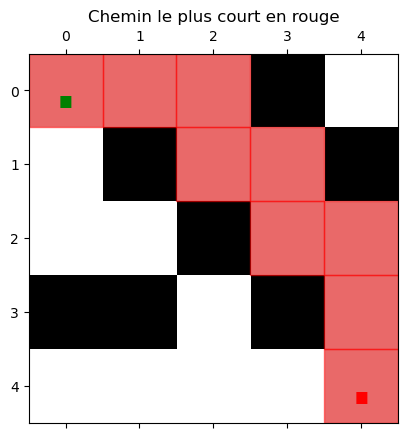

In [36]:
def display_grid_with_paths(grid, all_paths, shortest_path):
    grid_np = np.zeros_like(grid, dtype=int)  

    # Convert the grid into a numerical matrix for easier manipulation
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 'X':
                grid_np[i][j] = -1  # Mark obstacles with -1
            elif (i, j) in shortest_path:
                grid_np[i][j] = 2  # Mark cells in the shortest path with 2
            elif (i, j) in [p for path in all_paths for p in path]:
                grid_np[i][j] = 1  # Mark other paths with 1

    # Create the figure and axis for display
    fig, ax = plt.subplots()

    # Create a custom colormap where 0 (white) represents free space, 1 (light gray) represents other paths,
    # and 2 (red) represents the shortest path
    cmap = plt.matplotlib.colors.ListedColormap(['black', 'white', 'lightgray'])

    # Display the grid
    ax.matshow(grid_np, cmap=cmap)

    # Display the grid with cell values
    for i in range(len(grid_np)):
        for j in range(len(grid_np[0])):
            if grid_np[i][j] != -1:  # Do not display obstacles
                ax.text(j, i, str(grid[i][j]), va='center', ha='center')

    # Mark the start and end points
    ax.text(shortest_path[0][1], shortest_path[0][0], '.', color='green', va='center', ha='center', fontweight='bold', fontsize=45)
    ax.text(shortest_path[-1][1], shortest_path[-1][0], '.', color='red', va='center', ha='center', fontweight='bold', fontsize=45)


    # Highlight the shortest path cells
    for pos in shortest_path:
        ax.add_patch(plt.Rectangle((pos[1] - 0.5, pos[0] - 0.5), 1, 1, color='red', alpha=0.5))

    # Show the grid with the shortest path highlighted
    plt.title('Chemin le plus court en rouge')
    plt.show()

# Example Usage
grid = [
    [' ', ' ', ' ', 'X', ' '],
    [' ', 'X', '', ' ', 'X'],
    [' ', ' ', 'X', ' ', ' '],
    ['X', 'X', ' ', 'X', ' '],
    [' ', ' ', ' ', ' ', ' ']
]

start = (0, 0)
end = (4, 4)

all_paths = find_paths(grid, start, end)
shortest_path = find_shortest_path(all_paths, grid)
print("Tous les chemins possibles vers la destination :", all_paths)
print("Le chemin le plus court :", shortest_path)

display_grid_with_paths(grid, all_paths, shortest_path)


In [ ]:
import tkinter as tk
from tkinter import messagebox
import random
import matplotlib.pyplot as plt

class Labyrinthe:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.grid = [[0 for _ in range(cols)] for _ in range(rows)]  # 0 représente une case blanche, 1 représente un mur
        self.generate_maze()

    def generate_maze(self):
        # Générer des murs aléatoires
        for _ in range(self.rows * self.cols // 4):  # ajustez cette valeur pour changer la densité de murs
            row = random.randint(0, self.rows - 1)
            col = random.randint(0, self.cols - 1)
            self.grid[row][col] = 1

    def print_maze(self):
        for row in self.grid:
            print(''.join(['#' if cell == 1 else '.' for cell in row]))

    def plot_maze(self):
        plt.imshow(self.grid, cmap='gray', interpolation='nearest')
        plt.show()

    def is_connected(self):
        def dfs(row, col):
            if row < 0 or col < 0 or row >= len(self.grid) or col >= len(self.grid[0]) or self.grid[row][col] != 0:
                return
            self.grid[row][col] = 2  # marque la cellule comme visitée
            dfs(row + 1, col)
            dfs(row - 1, col)
            dfs(row, col + 1)
            dfs(row, col - 1)

        # Trouver la première cellule blanche comme point de départ
        start_row, start_col = -1, -1
        for i in range(len(self.grid)):
            for j in range(len(self.grid[0])):
                if self.grid[i][j] == 0:
                    start_row, start_col = i, j
                    break
            if start_row != -1:
                break

        if start_row == -1:  # Aucune cellule blanche trouvée
            return False

        # Vérifier la connectivité en utilisant DFS
        dfs(start_row, start_col)

        # Vérifier si toutes les cellules blanches ont été visitées
        for row in self.grid:
            for cell in row:
                if cell == 0:
                    return False

        return True

    def find_shortest_path(self):
        def bfs(start, end):
            queue = [[start]]
            visited = set()

            while queue:
                path = queue.pop(0)
                node = path[-1]

                if node == end:
                    return path

                if node not in visited:
                    for adjacent in get_adjacent(node):
                        new_path = list(path)
                        new_path.append(adjacent)
                        queue.append(new_path)

                    visited.add(node)

            return None

        def get_adjacent(node):
            row, col = node
            adjacent = []

            if row > 0 and self.grid[row - 1][col] == 0:
                adjacent.append((row - 1, col))
            if row < self.rows - 1 and self.grid[row + 1][col] == 0:
                adjacent.append((row + 1, col))
            if col > 0 and self.grid[row][col - 1] == 0:
                adjacent.append((row, col - 1))
            if col < self.cols - 1 and self.grid[row][col + 1] == 0:
                adjacent.append((row, col + 1))

            return adjacent

        # Trouver le chemin le plus court entre les coins supérieur gauche et inférieur droit
        start = (0, 0)
        end = (self.rows - 1, self.cols - 1)
        shortest_path = bfs(start, end)

        # Marquer le chemin le plus court dans la grille finale
        if shortest_path:
            for row, col in shortest_path:
                self.grid[row][col] = 3  # 3 représente le chemin

        return shortest_path


class LabyrintheGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Labyrinthe Solver")
        self.root.geometry("400x300")

        self.label_dimension = tk.Label(root, text="Entrez les dimensions du labyrinthe:")
        self.label_dimension.pack()

        self.frame_dimensions = tk.Frame(root)
        self.frame_dimensions.pack()

        self.label_rows = tk.Label(self.frame_dimensions, text="Lignes:")
        self.label_rows.grid(row=0, column=0)
        self.entry_rows = tk.Entry(self.frame_dimensions)
        self.entry_rows.grid(row=0, column=1)

        self.label_cols = tk.Label(self.frame_dimensions, text="Colonnes:")
        self.label_cols.grid(row=1, column=0)
        self.entry_cols = tk.Entry(self.frame_dimensions)
        self.entry_cols.grid(row=1, column=1)

        self.button_generate = tk.Button(root, text="Générer Labyrinthe", command=self.generate_maze)
        self.button_generate.pack()

    def generate_maze(self):
        try:
            rows = int(self.entry_rows.get())
            cols = int(self.entry_cols.get())
            if rows <= 0 or cols <= 0:
                raise ValueError
            labyrinth = Labyrinthe(rows, cols)
            labyrinth.plot_maze()

            shortest_path = labyrinth.find_shortest_path()
            if shortest_path:
                messagebox.showinfo("Chemin le plus court", f"Le chemin le plus court a une longueur de {len(shortest_path)} cases.")
            else:
                messagebox.showinfo("Chemin le plus court", "Aucun chemin trouvé.")

            self.save_images(labyrinth)

        except ValueError:
            messagebox.showerror("Erreur", "Veuillez entrer des valeurs valides pour les dimensions.")

    def save_images(self, labyrinth):
        plt.imshow(labyrinth.grid, cmap='gray', interpolation='nearest')
        plt.savefig("labyrinthe_final.png")

        # Réinitialiser la grille pour sauvegarder la grille initiale
        labyrinth.grid = [[0 for _ in range(labyrinth.cols)] for _ in range(labyrinth.rows)]
        plt.imshow(labyrinth.grid, cmap='gray', interpolation='nearest')
        plt.savefig("labyrinthe_initial.png")

if __name__ == "__main__":
    root = tk.Tk()
    app = LabyrintheGUI(root)
    root.mainloop()
